In [1]:
#importing necessary libraries

import pandas as pd
import re
import warnings
warnings.simplefilter('ignore')
import nltk

In [2]:
# reading sample twitter customer support data into 'df' dataframe

df = pd.read_csv('twcs_sample.csv')

In [3]:
df.head(20)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregar...,119236,NaN
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,@105835 Your business means a lot to us. Pleas...,NaN,119239.0
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm su...,119238,NaN
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,@105836 LiveChat is online at the moment - htt...,119241,119242.0
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've...,119243,119240.0
5,119243,VirginTrains,False,Tue Oct 10 15:25:14 +0000 2017,"@105836 Have you tried from another device, Mi...",119244,119241.0
6,119244,105836,True,Tue Oct 10 15:26:44 +0000 2017,"@VirginTrains yep, I've tried laptop too sever...",119245,119243.0
7,119245,VirginTrains,False,Tue Oct 10 15:33:22 +0000 2017,"@105836 It's working OK from here, Miriam. Doe...",NaN,119244.0
8,119242,105836,True,Tue Oct 10 15:09:00 +0000 2017,@VirginTrains I still haven't heard &amp; the ...,119240,119246.0
9,119246,VirginTrains,False,Tue Oct 10 10:13:19 +0000 2017,@105836 That's what we're here for Miriam 😊 T...,119242,119247.0


In [4]:
df.shape

(93, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 93 non-null     int64  
 1   author_id                93 non-null     object 
 2   inbound                  93 non-null     bool   
 3   created_at               93 non-null     object 
 4   text                     93 non-null     object 
 5   response_tweet_id        65 non-null     object 
 6   in_response_to_tweet_id  68 non-null     float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 4.6+ KB


In [6]:
#checking for null values in 'df'
df.isnull().sum()

tweet_id                    0
author_id                   0
inbound                     0
created_at                  0
text                        0
response_tweet_id          28
in_response_to_tweet_id    25
dtype: int64

In [7]:
# extracting customer only tweets and saving it to cust dataframe

cust = df[df['author_id'].str.isnumeric()]
cust.reset_index(drop=True)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregar...,119236,NaN
1,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm su...,119238,NaN
2,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've...,119243,119240.0
3,119244,105836,True,Tue Oct 10 15:26:44 +0000 2017,"@VirginTrains yep, I've tried laptop too sever...",119245,119243.0
4,119242,105836,True,Tue Oct 10 15:09:00 +0000 2017,@VirginTrains I still haven't heard &amp; the ...,119240,119246.0
5,119249,105837,True,Wed Oct 11 07:37:27 +0000 2017,"@105838 @AppleSupport Me too am suffering , ho...",119248,119250.0
6,119250,105838,True,Wed Oct 11 05:33:17 +0000 2017,"@AppleSupport hi #apple, I’ve a concern about ...","119249,119251",NaN
7,119253,105839,True,Wed Oct 11 07:21:34 +0000 2017,I just updated my phone and suddenly everythin...,119252,NaN
8,119255,105840,True,Wed Oct 11 13:45:59 +0000 2017,@SpotifyCares Thanks! Version 8.4.22.857 armv7...,119257,119254.0
9,119258,105840,True,Wed Oct 11 14:01:58 +0000 2017,"@SpotifyCares No, but I've moved speaker to ab...",119259,119257.0


In [8]:
# extracting business only tweets and saving it to comp dataframe

comp = df[df['author_id'].str.isalpha()]
comp.reset_index(drop=True)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,@105835 Your business means a lot to us. Pleas...,NaN,119239.0
1,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,@105836 LiveChat is online at the moment - htt...,119241,119242.0
2,119243,VirginTrains,False,Tue Oct 10 15:25:14 +0000 2017,"@105836 Have you tried from another device, Mi...",119244,119241.0
3,119245,VirginTrains,False,Tue Oct 10 15:33:22 +0000 2017,"@105836 It's working OK from here, Miriam. Doe...",NaN,119244.0
4,119246,VirginTrains,False,Tue Oct 10 10:13:19 +0000 2017,@105836 That's what we're here for Miriam 😊 T...,119242,119247.0
5,119248,AppleSupport,False,Wed Oct 11 13:38:29 +0000 2017,@105837 We can help. Which version of iOS are ...,NaN,119249.0
6,119252,AppleSupport,False,Wed Oct 11 13:40:27 +0000 2017,@105839 Thanks for reaching out to us. We are ...,NaN,119253.0
7,119254,SpotifyCares,False,Wed Oct 11 13:41:25 +0000 2017,@105840 Hi there! What device is this happenin...,119255,119256.0
8,119257,SpotifyCares,False,Wed Oct 11 14:00:48 +0000 2017,@105840 Thanks. The distance could possibly af...,119258,119255.0
9,119259,SpotifyCares,False,Wed Oct 11 14:20:00 +0000 2017,@105840 That's great to hear. If anything come...,119260,119258.0


## Text Preprocessing

In [9]:
# function to remove urls from 'text' column from customer only tweets dataframe

def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub("",text)

In [10]:
# remove urls from 'text' column

cust['text'] = cust['text'].apply(remove_url)
cust['text']

0     @AppleSupport causing the reply to be disregar...
2     @76328 I really hope you all change but I'm su...
4     @VirginTrains see attached error message. I've...
6     @VirginTrains yep, I've tried laptop too sever...
8     @VirginTrains I still haven't heard &amp; the ...
11    @105838 @AppleSupport Me too am suffering , ho...
12    @AppleSupport hi #apple, I’ve a concern about ...
14    I just updated my phone and suddenly everythin...
16    @SpotifyCares Thanks! Version 8.4.22.857 armv7...
18    @SpotifyCares No, but I've moved speaker to ab...
20                     @SpotifyCares Brilliant thanks 😊
22    @76495 @91226 Please help! Spotify Premium ski...
24    @AppleSupport after the 11.0.2 my phone just s...
26    First flight for long time with @British_Airwa...
28    Okay @76099 I used my fucking phone for 2 minu...
30    @AppleSupport Can you get my iPhone 7plus back...
32    You’ve paralysed my phone with your update @76...
34    @O2 I received this a few weeks ago, since

In [11]:
# function to remove html tags from 'text' column

def remove_html_tags(text):
    pattern=re.compile('<.*?>')
    return pattern.sub("",text)

In [12]:
# removing html tags from 'text' column

cust['text'] = cust['text'].apply(remove_html_tags)
cust['text']

0     @AppleSupport causing the reply to be disregar...
2     @76328 I really hope you all change but I'm su...
4     @VirginTrains see attached error message. I've...
6     @VirginTrains yep, I've tried laptop too sever...
8     @VirginTrains I still haven't heard &amp; the ...
11    @105838 @AppleSupport Me too am suffering , ho...
12    @AppleSupport hi #apple, I’ve a concern about ...
14    I just updated my phone and suddenly everythin...
16    @SpotifyCares Thanks! Version 8.4.22.857 armv7...
18    @SpotifyCares No, but I've moved speaker to ab...
20                     @SpotifyCares Brilliant thanks 😊
22    @76495 @91226 Please help! Spotify Premium ski...
24    @AppleSupport after the 11.0.2 my phone just s...
26    First flight for long time with @British_Airwa...
28    Okay @76099 I used my fucking phone for 2 minu...
30    @AppleSupport Can you get my iPhone 7plus back...
32    You’ve paralysed my phone with your update @76...
34    @O2 I received this a few weeks ago, since

In [13]:
#Data Cleaning

# remove everything (punctuation,symbols,emojis etc.) except alphabets`
cust['text'] = cust['text'].str.replace("[^a-zA-Z]", " ")

# remove short words
cust['text'] = cust['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
cust['text'] = cust['text'].apply(lambda x: x.lower())
cust['text']

0     applesupport causing reply disregarded tapped ...
2                  really hope change sure because have
4     virgintrains attached error message tried leav...
6     virgintrains tried laptop several times over p...
8     virgintrains still haven heard number directed...
11            applesupport suffering hope find solution
12    applesupport apple concern about latest slow i...
14    just updated phone suddenly everything takes a...
16    spotifycares thanks version armv anker bluetoo...
18    spotifycares moved speaker about metre away sk...
20                        spotifycares brilliant thanks
22    please help spotify premium skipping through s...
24    applesupport after phone just sucks most apps ...
26    first flight long time with british airways ov...
28    okay used fucking phone minutes drains down fu...
30    applesupport iphone plus back please battery r...
32         paralysed phone with your update grrrrrrrrrr
34    received this weeks since then been gettin

In [14]:
# function to generate tokens and remove stopwords

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def remove_stopwords(dataframe, column_name):
    stop_words = set(stopwords.words('english'))

    def remove_stopwords_from_text(text):
        words = word_tokenize(text)
        filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
        return ' '.join(filtered_words)

    dataframe[column_name] = dataframe[column_name].apply(remove_stopwords_from_text)
    return dataframe


In [15]:
# remove stopwords from text column

cust = remove_stopwords(cust, 'text')

In [16]:
cust['text']

0     applesupport causing reply disregarded tapped ...
2                               really hope change sure
4     virgintrains attached error message tried leav...
6     virgintrains tried laptop several times past w...
8     virgintrains still heard number directed phone...
11            applesupport suffering hope find solution
12    applesupport apple concern latest slow iphone ...
14    updated phone suddenly everything takes ages l...
16    spotifycares thanks version armv anker bluetoo...
18    spotifycares moved speaker metre away skipping...
20                        spotifycares brilliant thanks
22    please help spotify premium skipping songs con...
24    applesupport phone sucks apps broken wifi disc...
26    first flight long time british airways delay s...
28    okay used fucking phone minutes drains fucking...
30    applesupport iphone plus back please battery r...
32                   paralysed phone update grrrrrrrrrr
34    received weeks since getting calls telemar

In [17]:
# function to generate lemmas

from nltk.stem import WordNetLemmatizer

def lemmatize_text(dataframe, column_name):
    lemmatizer = WordNetLemmatizer()

    def lemmatize_sentence(sentence):
        words = word_tokenize(sentence)
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        return ' '.join(lemmatized_words)

    dataframe[column_name] = dataframe[column_name].apply(lemmatize_sentence)
    return dataframe

In [18]:
# perform lemmatization

cust = lemmatize_text(cust, 'text')

In [19]:
cust['text']

0     applesupport causing reply disregarded tapped ...
2                               really hope change sure
4     virgintrains attached error message tried leav...
6     virgintrains tried laptop several time past we...
8     virgintrains still heard number directed phone...
11            applesupport suffering hope find solution
12    applesupport apple concern latest slow iphone ...
14    updated phone suddenly everything take age loa...
16    spotifycares thanks version armv anker bluetoo...
18    spotifycares moved speaker metre away skipping...
20                        spotifycares brilliant thanks
22    please help spotify premium skipping song cons...
24    applesupport phone suck apps broken wifi disco...
26    first flight long time british airway delay sh...
28    okay used fucking phone minute drain fucking p...
30    applesupport iphone plus back please battery r...
32                   paralysed phone update grrrrrrrrrr
34    received week since getting call telemarke

## Text Encoding

In [20]:
#perform one hot encoding on 'text' column

dummy1 = pd.get_dummies(cust[['text']], drop_first=True)

In [21]:
dummy1

,text_applesupport causing reply disregarded tapped notification keyboard opened,text_applesupport iphone plus back please battery run half time apps frequently crash,text_applesupport latest version read help page turned virtually apps location typing dropped life,text_applesupport latest version started immediately updated phone,text_applesupport need code store recd many sent help,text_applesupport phone suck apps broken wifi disconnect frequently apple painfulupdate,text_applesupport suffering hope find solution,text_applesupport super help problem solved love apple,text_applesupport update horrible,text_applesupport update still killing battery within hour phone month disgrace used day,...,text_tesco offlicense,text_tesco point enforced properly plus take common sense think person look,text_tesco website broken telling delivery slot next week find slightly unlikely,text_took phone charge battery remaining sort battery life,text_update listen music whatsapp time,text_updated phone suddenly everything take age load update hate,text_virgintrains attached error message tried leaving voicemail several time past week,text_virgintrains still heard number directed phone dead live chat work someone call,text_virgintrains tried laptop several time past week today tried different browser,text_wish amazon option shipped store avoid struggle
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Document Matrix(Bag Of Words)

from sklearn.feature_extraction.text import CountVectorizer
BOW=CountVectorizer()
document_matrix=BOW.fit_transform(cust["text"])

In [23]:
document_matrix

<49x276 sparse matrix of type '<class 'numpy.int64'>'
	with 392 stored elements in Compressed Sparse Row format>

In [24]:
BOW.vocabulary_ #vocabulary of the Bag-of-Words model 

{'applesupport': 9,
 'causing': 29,
 'reply': 184,
 'disregarded': 59,
 'tapped': 236,
 'notification': 149,
 'keyboard': 110,
 'opened': 154,
 'really': 176,
 'hope': 96,
 'change': 30,
 'sure': 232,
 'virgintrains': 259,
 'attached': 12,
 'error': 67,
 'message': 135,
 'tried': 249,
 'leaving': 119,
 'voicemail': 261,
 'several': 196,
 'time': 245,
 'past': 161,
 'week': 265,
 'laptop': 115,
 'today': 246,
 'different': 55,
 'browser': 23,
 'still': 223,
 'heard': 92,
 'number': 150,
 'directed': 56,
 'phone': 164,
 'dead': 50,
 'live': 123,
 'chat': 32,
 'work': 272,
 'someone': 210,
 'call': 27,
 'suffering': 230,
 'find': 72,
 'solution': 208,
 'apple': 8,
 'concern': 41,
 'latest': 117,
 'slow': 206,
 'iphone': 105,
 'happy': 90,
 'please': 166,
 'updated': 255,
 'suddenly': 229,
 'everything': 69,
 'take': 234,
 'age': 1,
 'load': 124,
 'update': 254,
 'hate': 91,
 'spotifycares': 218,
 'thanks': 242,
 'version': 258,
 'armv': 11,
 'anker': 6,
 'bluetooth': 18,
 'speaker': 214,


In [25]:
BOW.get_feature_names()

['adnams',
 'age',
 'aircraft',
 'airway',
 'amazon',
 'android',
 'anker',
 'answer',
 'apple',
 'applesupport',
 'apps',
 'armv',
 'attached',
 'avoid',
 'away',
 'back',
 'battery',
 'blind',
 'bluetooth',
 'brilliant',
 'british',
 'broadside',
 'broken',
 'browser',
 'buying',
 'cable',
 'cache',
 'call',
 'called',
 'causing',
 'change',
 'charge',
 'chat',
 'cheer',
 'close',
 'coaxial',
 'code',
 'colleague',
 'come',
 'common',
 'companion',
 'concern',
 'constantly',
 'cooky',
 'crash',
 'crossed',
 'cumbersome',
 'curious',
 'customer',
 'day',
 'dead',
 'delay',
 'delete',
 'delivery',
 'depart',
 'different',
 'directed',
 'disconnect',
 'disgrace',
 'disregarded',
 'distance',
 'done',
 'drain',
 'dropped',
 'early',
 'enforced',
 'enough',
 'error',
 'every',
 'everything',
 'exact',
 'faves',
 'find',
 'finding',
 'finger',
 'first',
 'five',
 'flight',
 'free',
 'freeze',
 'frequently',
 'fucking',
 'galaxy',
 'game',
 'getting',
 'green',
 'grrrrrrrrrr',
 'guess',
 'h

In [26]:
#Performing N-grams technique :bigram

bigram=CountVectorizer(ngram_range=(2,2))
bigramvocab=bigram.fit_transform(cust["text"])
bigram.vocabulary_

{'applesupport causing': 12,
 'causing reply': 47,
 'reply disregarded': 202,
 'disregarded tapped': 71,
 'tapped notification': 271,
 'notification keyboard': 161,
 'keyboard opened': 128,
 'really hope': 196,
 'hope change': 113,
 'change sure': 48,
 'virgintrains attached': 315,
 'attached error': 25,
 'error message': 80,
 'message tried': 149,
 'tried leaving': 299,
 'leaving voicemail': 136,
 'voicemail several': 319,
 'several time': 214,
 'time past': 290,
 'past week': 170,
 'virgintrains tried': 317,
 'tried laptop': 298,
 'laptop several': 131,
 'week today': 326,
 'today tried': 294,
 'tried different': 296,
 'different browser': 67,
 'virgintrains still': 316,
 'still heard': 256,
 'heard number': 107,
 'number directed': 162,
 'directed phone': 68,
 'phone dead': 173,
 'dead live': 62,
 'live chat': 138,
 'chat work': 50,
 'work someone': 332,
 'someone call': 230,
 'applesupport suffering': 17,
 'suffering hope': 265,
 'hope find': 114,
 'find solution': 86,
 'applesuppo

In [27]:
#Performing N-grams technique :trigram

trigram=CountVectorizer(ngram_range=(3,3))
trigramdata=trigram.fit_transform(cust["text"])
trigram.vocabulary_

{'applesupport causing reply': 11,
 'causing reply disregarded': 45,
 'reply disregarded tapped': 184,
 'disregarded tapped notification': 66,
 'tapped notification keyboard': 242,
 'notification keyboard opened': 145,
 'really hope change': 179,
 'hope change sure': 99,
 'virgintrains attached error': 276,
 'attached error message': 25,
 'error message tried': 74,
 'message tried leaving': 132,
 'tried leaving voicemail': 265,
 'leaving voicemail several': 121,
 'voicemail several time': 280,
 'several time past': 195,
 'time past week': 258,
 'virgintrains tried laptop': 278,
 'tried laptop several': 264,
 'laptop several time': 115,
 'past week today': 154,
 'week today tried': 286,
 'today tried different': 261,
 'tried different browser': 263,
 'virgintrains still heard': 277,
 'still heard number': 227,
 'heard number directed': 94,
 'number directed phone': 146,
 'directed phone dead': 63,
 'phone dead live': 156,
 'dead live chat': 57,
 'live chat work': 123,
 'chat work someon

In [28]:
#Performing TF-IDF transformation

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tfidf.fit_transform(cust["text"]).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
tfidf.get_feature_names_out() #retrieving the feature names

array(['adnams', 'age', 'aircraft', 'airway', 'amazon', 'android',
       'anker', 'answer', 'apple', 'applesupport', 'apps', 'armv',
       'attached', 'avoid', 'away', 'back', 'battery', 'blind',
       'bluetooth', 'brilliant', 'british', 'broadside', 'broken',
       'browser', 'buying', 'cable', 'cache', 'call', 'called', 'causing',
       'change', 'charge', 'chat', 'cheer', 'close', 'coaxial', 'code',
       'colleague', 'come', 'common', 'companion', 'concern',
       'constantly', 'cooky', 'crash', 'crossed', 'cumbersome', 'curious',
       'customer', 'day', 'dead', 'delay', 'delete', 'delivery', 'depart',
       'different', 'directed', 'disconnect', 'disgrace', 'disregarded',
       'distance', 'done', 'drain', 'dropped', 'early', 'enforced',
       'enough', 'error', 'every', 'everything', 'exact', 'faves', 'find',
       'finding', 'finger', 'first', 'five', 'flight', 'free', 'freeze',
       'frequently', 'fucking', 'galaxy', 'game', 'getting', 'green',
       'grrrrrrrr

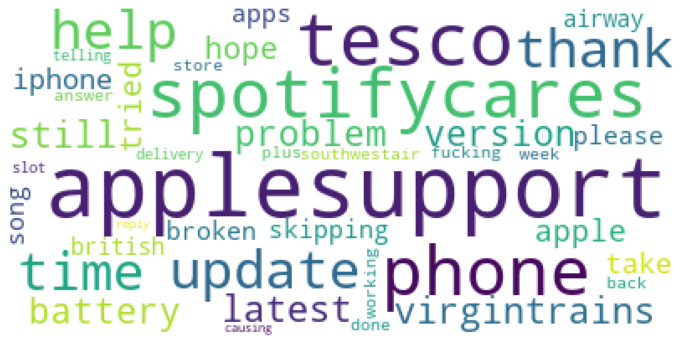

In [30]:
#Using a word cloud find the top 40 words by frequency after processing the text

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(12.0,12.0)
mpl.rcParams['font.size']=12
mpl.rcParams['savefig.dpi']=100
mpl.rcParams['figure.subplot.bottom']=0.1
stopwords= set(STOPWORDS)

wordcloud = WordCloud(background_color='white',stopwords= stopwords, max_words=40, random_state=42).generate(str(cust['text']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

## Encoding techniques concepts

**One-hot Encoding**

One-hot encoding is a technique used in machine learning and data preprocessing to represent categorical variables as binary vectors.

- Advantages of One-hot Encoding:
 - Preservation of Information: preserves the information about the categorical variable without imposing ordinal relationships between categories. Each category is represented by a unique binary value, preventing the model from assuming any inherent order.
  - Compatibility with Machine Learning Algorithms: One-hot encoding converts categorical variables into a format that can be easily used by machine learning algorithms, especially those based on numerical computations.
  - Avoidance of Arbitrary Numerical Assignments: When representing categorical variables with numerical labels, there is a risk of introducing arbitrary assignments that might mislead the model. One-hot encoding eliminates this risk by representing each category with a distinct binary value.
  - Interpretability: The binary representation of one-hot encoding makes it easy to interpret the input features. Each bit in the binary vector corresponds to the presence or absence of a specific category, providing transparency and interpretability in model analysis.
  - Robust to Changes in Category Representation: One-hot encoding is robust to changes in the representation of categorical variables. If new categories are added or removed, the one-hot encoding can be easily updated without affecting the structure of the existing encoding.


- Disadvantages of One-hot Encoding:
 - Increased Dimensionality: One-hot encoding can lead to a significant increase in the dimensionality of the dataset, especially when dealing with categorical variables with a large number of unique categories.
 - Sparse Data Representation: One-hot encoding often results in sparse data, where the majority of the entries in the encoded vectors are zero. While sparse data is memory-efficient, it may pose challenges for certain machine learning algorithms that are not optimized for sparse matrices, potentially leading to slower training times.
 - Loss of Semantics: One-hot encoding does not capture any semantic relationships between categories. All categories are treated as independent, and the model does not learn any intrinsic relationships or similarities between them. This limitation can be important in cases where there is some meaningful ordinal or hierarchical structure among categories.
 - Handling of Out-of-Vocabulary (OOV) Data: One-hot encoding requires a predefined set of categories, and it may not handle well the introduction of new or unseen categories (out-of-vocabulary data). 
 - Redundancy and Collinearity: One-hot encoding introduces a binary indicator for each category, leading to redundancy in the representation. The presence of one category implies the absence of all others, resulting in multicollinearity, which can affect the stability of some models.

**Bag of Words**

Bag of words (BoW) is a statistical model used to analyze documents and text based on word count. It's used in information retrieval (IR) and natural language processing.

- Advantages of Bow:
 - Simplicity: The BoW model is straightforward and easy to implement. It represents a document as an unordered set of words, discarding grammar and word order. This simplicity makes it a good starting point for text-based tasks.
 - Versatility:BoW can be applied to various NLP tasks, including text classification, sentiment analysis, and document retrieval. Its versatility allows it to be used as a feature representation in many machine learning algorithms.
 - Language Independence:BoW is language-independent, as it only considers the presence or absence of words in a document. This makes it applicable to multiple languages without the need for language-specific preprocessing.
 - Dimensionality Reduction: BoW inherently performs a form of dimensionality reduction by representing documents as vectors of word frequencies or binary values (presence or absence). This can be advantageous when dealing with high-dimensional text data.
 - Robust to Noise: BoW can be robust to noisy data, as it doesn't heavily rely on the specific arrangement or structure of words in a document. It is less sensitive to irrelevant details, making it suitable for handling texts with varied styles or formats.
 
- Disadvanatges of BoW:
 - Loss of Word Order: BoW disregards the order of words in a document, treating it as an unordered set of words. This can be a significant limitation when dealing with tasks where word order and context are crucial
 - Semantic Information Loss: BoW fails to capture the semantic relationships between words. It treats words as independent entities, neglecting their contextual meanings and associations.
 - Sparsity: The BoW representation can result in sparse vectors, especially when dealing with a large vocabulary. Sparse vectors may lead to increased computational complexity, memory requirements, and potential challenges for certain machine learning algorithms not optimized for sparse data.
 - Equal Importance of All Words: BoW assumes that all words contribute equally to the representation of a document. However, in many cases, certain words may carry more significance or convey more meaning than others. BoW does not inherently differentiate between important and less important words.
 - Inability to Handle Typos and Misspellings: BoW is sensitive to variations in word spellings and may treat differently spelled words as distinct entities. This can be a challenge when dealing with noisy or unstructured text data containing typos or misspellings.
 - Vocabulary Size Challenges: BoW requires a predefined vocabulary, and the size of the vocabulary can significantly impact the representation. Managing and updating the vocabulary with new words or handling out-of-vocabulary words can be challenging in dynamic language environments.


**N-grams**

N-grams are contiguous sequences of n items (usually words) from a given sample of text or speech

- Advantages of N-grams technique:
 - Capturing Local Context:N-grams capture local context by considering sequences of adjacent words. This helps in preserving some level of word order information, which is crucial for understanding the meaning of phrases and sentences.
  - Flexibility in Context Size: N-grams allow for flexibility in choosing the size of the context (n). Smaller values of n, such as bigrams (2-grams) or trigrams (3-grams), capture shorter sequences, while larger values of n capture longer dependencies. 
  - Reduced Sparsity: Compared to Bag of Words (BoW) representations, which can result in sparse vectors, N-grams often result in denser representations. By capturing sequences of words, N-grams mitigate some of the sparsity issues associated with BoW, making them more suitable for certain machine learning algorithms.
  - Effective in Syntax and Semantics: N-grams can effectively capture both syntactic and semantic information. For example, trigrams can help in capturing not only adjacent word relationships but also relationships where one word acts as a bridge between two others.
  - Improved Language Modeling: N-grams are commonly used in language modeling tasks, where the goal is to predict the next word in a sequence given the context. N-gram models, such as bigram or trigram models, provide a simple and effective way to model language patterns.
  
  
- Disadvantages of N-grams technique:
 - Curse of Dimensionality: As the size of N (the number of consecutive items in the sequence) increases, the number of possible N-grams grows exponentially. This can lead to a high-dimensional feature space. The increased dimensionality may pose challenges in terms of computational resources, storage, and model complexity.
 - Loss of Global Context: N-grams focus on local context, considering only adjacent sequences of words. This can lead to a loss of global context, making it challenging to capture long-range dependencies and understand the overall structure of a document or sentence.
 - Data Sparsity: N-grams can suffer from data sparsity issues, especially when dealing with larger values of N. Some N-grams may occur infrequently or not at all in the training data, leading to sparse representations. This sparsity can affect the reliability of statistical estimates and the effectiveness of machine learning models.
 - Increased Memory Requirements: Larger values of N result in longer sequences, leading to increased memory requirements for storing and processing N-grams. This can be a concern when working with large datasets or in resource-constrained environments.
 - Difficulty with Out-of-Vocabulary Words: N-grams rely on a predefined vocabulary, and out-of-vocabulary words may pose challenges. If a word is not present in the vocabulary, the N-gram model may not be able to effectively capture its relationships with other words.

**TF-IDF**

Term Frequency-Inverse Document Frequency (TF-IDF) is a numerical statistic used in information retrieval and text mining to evaluate the importance of a word in a document relative to a collection of documents. 

- Advantages of TF-IDF technique:
 - Term Importance: TF-IDF reflects the importance of a term within a document by considering both its frequency in the document (Term Frequency, TF) and its rarity across the entire document collection (Inverse Document Frequency, IDF). This helps prioritize terms that are both frequent within a document and unique to that document.
  - Normalization of Term Frequency: TF-IDF normalizes the term frequency to prevent bias toward longer documents. It divides the raw term frequency by the total number of terms in the document, providing a relative measure of term importance.
  - Implicit Feature Selection: TF-IDF acts as an implicit feature selection mechanism by assigning higher weights to terms that are discriminative for a document compared to the entire document collection. This can improve the efficiency and effectiveness of machine learning models by focusing on the most relevant features.
  - Language Independence: TF-IDF is language-independent and can be applied to documents in various languages without modification. This makes it a versatile technique for information retrieval and text analysis tasks in multilingual environments.
  - Handling Noisy Data: TF-IDF is robust to noisy and irrelevant terms that may appear frequently within individual documents but are not discriminative across the entire document collection. This robustness contributes to improved information retrieval and text mining performance.
  
  
- Disadvantages of TF-IDF:
 - Ignores Word Order and Semantics: TF-IDF treats documents as bags of words, disregarding word order and semantic relationships between words. This limitation makes it less suitable for tasks where word order and context are crucial, such as natural language understanding and sentiment analysis.
 - Sensitivity to Stop Words: Commonly used words, known as stop words (e.g., "the," "and," "is"), often have high term frequency but low information content. TF-IDF may not effectively down-weight these stop words, leading to potentially misleading representations.
 - Doesn't Capture Synonyms and Polysemy: TF-IDF does not inherently capture the meanings of words or consider synonyms. Different words with similar meanings may be treated independently, and polysemous words (words with multiple meanings) may not be disambiguated.
 - Limited Information on Term Importance: While TF-IDF provides a numerical score for each term, it may not directly indicate the specific importance or contribution of a term to the overall meaning of a document. Other techniques, such as word embeddings, can provide more nuanced representations of term importance.
 - Sparse Representations: In large document collections, TF-IDF representations can become very sparse, with many zero values. While sparsity can be advantageous for storage and computation efficiency, it may pose challenges for certain machine learning algorithms that are not well-suited to handle sparse data.